In [118]:
%matplotlib inline

from pathlib import Path 


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from mpl_toolkits.axisartist.axislines import AxesZero


import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/tex/')

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=300
mpl.rc("pgf", texsystem = "pdflatex", preamble = "\n".join(
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}', 
    ]))

In [399]:
def numberline(axes, x, y, width, height, ylim, axes_color='darkgray', xpad=2):
    numberline = axes.inset_axes([x, y, width, height])
    numberline.spines[["left", "right", "top"]].set_visible(False) 
    numberline.set(xlim=(-xpad, 2*np.pi+xpad), xticks=[0, 2*np.pi],
         xticklabels = ['0', r'$2\pi$'], 
         yticks=[], ylim=ylim)
    for (pos, mark) in [(0, "<"), (1, ">")]:
        numberline.plot(pos,0, mark, color=axes_color, markersize=4, 
                         transform=numberline.get_yaxis_transform(), clip_on=False)
    numberline.tick_params('x', direction='inout', colors=axes_color, labelsize=fs['script'])
    numberline.spines['bottom'].set_color(axes_color)
    numberline.spines['bottom'].set_position(('data', 0))
    return numberline

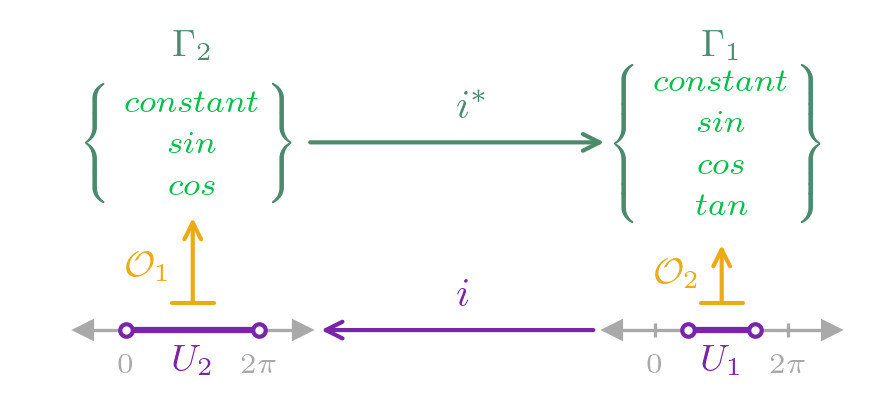

In [400]:
fig, ax = plt.subplots(figsize=(3.5, 1.25))
r = fig.canvas.get_renderer()

x1 = .2
x2 = .85 
y1 = .8
y2 = .1

# replace strings with little graphs
br2 = ax.text(x1, y1, r'$\begin{Bmatrix}\phantom{constantx}\\ \phantom{sin} \\ \phantom{cos} \\ \end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])
g2 = ax.text(x1, y1, r'$\begin{matrix} constant\\sin\\cos\\\end{matrix}$', 
             ha='center', va='center', color=pcd['section'], fontsize=fs['footnote'])

br1 = ax.text(x2, y1, r'$\begin{Bmatrix}\phantom{constantx}\\ \phantom{sin} \\ \phantom{cos} \\ \phantom{tan}\\\end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])
g1 = ax.text(x2, y1, r'$\begin{matrix} constant\\sin\\cos\\tan\\\end{matrix}$', 
             ha='center', va='center', color=pcd['section'], fontsize=fs['footnote'])

#make nodes
axh = .1

bb = br2.get_window_extent(renderer=r).transformed(ax.transData.inverted())
axw = bb.width

u2 = numberline(ax, x1-axw/2, y2, axw, axh, ylim=(-.2, .2))
u1 = numberline(ax, x2-axw/2, y2, axw, axh, ylim=(-.2, .2))

#annotate nodes
g1a = ax.annotate(r"$\Gamma_1$", (.5, 1), color=pcd['set'], 
                  xycoords=br1, va='bottom', ha='center', fontsize=fs['small'])
                  
g2a = ax.annotate(r"$\Gamma_2$", (.5, 0), color=pcd['set'], 
                  xycoords=(br2, g1a), va='bottom', ha='center', fontsize=fs['small'])
    
u1a = u1.annotate(f"$U_1$", (0, .01), xycoords=(g1a, 'axes fraction'), 
                  color=pcd['base'], va='top' , fontsize=fs['small'])
u2a = u2.annotate(f"$U_2$", (0, -.01), xycoords=(g2a, 'axes fraction'), 
                  color=pcd['base'], va='top', fontsize=fs['small'])
    
p_kwargs = dict( marker= 'o', mfc='white', lw=1.5, markersize=3, color=pcd['base'], zorder=10)
u2.plot([0, 2*np.pi], [0,0], **p_kwargs)
u1.plot([np.pi/2, 3*np.pi/2], [0,0],**p_kwargs)

    
# annotate: tail, head

u1_u2 = ax.annotate("", (1.05, 0), (-.05,0), xycoords=(u2.transAxes, u2.transData), 
                    textcoords= (u1.transAxes, u1.transData),
                    arrowprops=dict(arrowstyle = "->", color=pcd['base']))

u1_u2_l = ax.annotate(r"$i$", (.5, 1.5), xycoords=u1_u2, 
                      color=pcd['base'], ha='center', va='bottom', fontsize=fs['normal']) 

g2_g1 = ax.annotate("", (0, .5), (1,.5) , xycoords=br1, textcoords=br2, 
                   arrowprops=dict(arrowstyle = "->", color=pcd['set']))

g2_g1_l = ax.annotate("$i^*$", (0, 1.5), xycoords=(u1_u2_l, g2_g1), 
                      color=pcd['set'], va='bottom', fontsize=fs['normal'])


sheafs = {i : ax.annotate("", (.5, -.15), (.5, 1.15), xycoords=head, textcoords=tail, 
                      arrowprops=dict(arrowstyle="]->,widthA=.5,lengthA=0", color=pcd['sheaf'])) 
          for (i, tail, head) in [(2, u2, g2), (1, u1, g1)]}
    
    
sheaf1_l = ax.annotate(r"$\mathcal{O}_{1}$", (0, .5), xycoords=sheafs[2], 
                       ha='right', va='center', color=pcd['sheaf'], fontsize=fs['small'])
 
sheaf1_2 = ax.annotate(r"$\mathcal{O}_{2}$", (0, 0), xycoords=(sheafs[1], sheaf1_l), 
                       ha='right', color=pcd['sheaf'], fontsize=fs['small'])


ax.axis('off')
ax.set(xlim=(0,1), ylim=(0,1))
fig.savefig(paper_path/'presheaf.pdf', bbox_inches='tight', backend='pgf')
fig.savefig(paper_path/'presheaf.png', bbox_inches='tight')

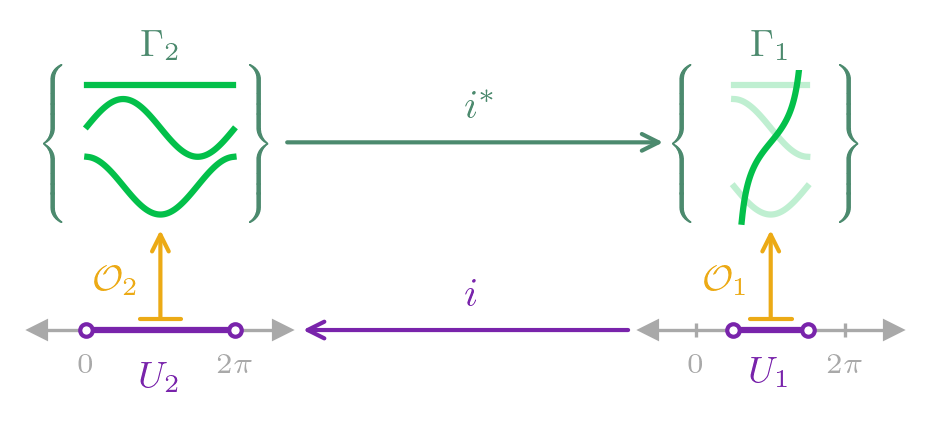

In [401]:
fig, ax = plt.subplots(figsize=(3.5, 1.25))
r = fig.canvas.get_renderer()

x1 = .1
x2 = .85 
y1 = .8
y2 = .1

# replace strings with little graphs

axh = 1

axw = .3
u2 = numberline(ax, x1-axw/2, y2, axw, axh, ylim=(-.1, .9))
u1 = numberline(ax, x2-axw/2, y2, axw, axh, ylim=(-.1, .9))

    
p_kwargs = dict( marker= 'o', mfc='white', lw=1.5, markersize=3, color=pcd['base'], zorder=10)

u2x = [0, 2*np.pi]
u1x = [np.pi/2, 3*np.pi/2]
ln2, = u2.plot(u2x, [0,0], **p_kwargs)
ln1, = u1.plot(u1x, [0,0],**p_kwargs)

u2xv = np.linspace(u2x[0], u2x[-1], 100)[1:-1]
u1xv = np.linspace(u1x[0], u1x[1], 100)[1:-1]
tu1xv = u1xv[10:-10]
tu1yv = np.tan(tu1xv)*.1 + .65
u1.plot(tu1xv, tu1yv, color=pcd['section'])

for axs, x, alpha in [(u1, u1xv, .25), (u2, u2xv, 1)]:
    axs.plot(x, np.ones(x.shape)*.85, color=pcd['section'], alpha=alpha)
    axs.plot(x, np.sin(x)*.1 + .7, color=pcd['section'], alpha=alpha)
    axs.plot(x, np.cos(x)*.1 + .5, color=pcd['section'], alpha=alpha)


br1 = u1.text(np.pi, np.min(tu1yv) + np.ptp(tu1yv)/2, r'$\begin{Bmatrix}\phantom{constant}\\ \phantom{sin} \\ \phantom{cos} \\ \phantom{tan}\end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])

br2 = u2.text(np.pi, np.min(tu1yv) + np.ptp(tu1yv)/2, r'$\begin{Bmatrix}\phantom{constantxy}\\ \phantom{sin} \\ \phantom{cos} \\ \phantom{tan}\end{Bmatrix}$', 
              ha='center', va='center', color=pcd['set'], fontsize=fs['footnote'])

#annotate nodes
g1a = ax.annotate(r"$\Gamma_1$", (.5, 1), color=pcd['set'], 
                  xycoords=br1, va='bottom', ha='center', fontsize=fs['small'])
                  
g2a = ax.annotate(r"$\Gamma_2$", (.5, 0), color=pcd['set'], 
                  xycoords=(br2, g1a), va='bottom', ha='center', fontsize=fs['small'])
    
u1a = u1.annotate(f"$U_1$", (0.5, .01), xycoords=(g1a, 'axes fraction'), 
                  color=pcd['base'], va='top', ha='center', fontsize=fs['small'])
u2a = u2.annotate(f"$U_2$", (0.5, -.01), xycoords=(g2a, 'axes fraction'), 
                  color=pcd['base'], va='top', ha='center', fontsize=fs['small'])
# annotate: tail, head

u1_u2 = ax.annotate("", (1.05, 0), (-.05,0), xycoords=(u2.transAxes, u2.transData), 
                    textcoords= (u1.transAxes, u1.transData),
                    arrowprops=dict(arrowstyle = "->", color=pcd['base']))

u1_u2_l = ax.annotate(r"$i$", (.5, 1.5), xycoords=u1_u2, 
                      color=pcd['base'], ha='center', va='bottom', fontsize=fs['normal']) 

g2_g1 = ax.annotate("", (0, .5), (1,.5) , xycoords=br1, textcoords=br2, 
                   arrowprops=dict(arrowstyle = "->", color=pcd['set']), zorder=10)

g2_g1_l = ax.annotate("$i^*$", (0, 1.5), xycoords=(u1_u2_l, g2_g1), 
                      color=pcd['set'], va='bottom', fontsize=fs['normal'])


for l, axsh in [(r"$\mathcal{O}_{2}$", u2), (r"$\mathcal{O}_{1}$", u1)]:
    sheaf = axsh.annotate("", (np.pi, .375), (np.pi, .01), arrowprops=dict(arrowstyle="]->,widthA=.5,lengthA=0", color=pcd['sheaf']))
    axsh.annotate(l, (0, .5), xycoords=sheaf, ha='right', va='center', color=pcd['sheaf'], fontsize=fs['small'])
 


ax.axis('off')
ax.set(xlim=(0,1), ylim=(0,1))
fig.savefig(paper_path/'presheaf.pdf', bbox_inches='tight', backend='pgf')
fig.savefig(paper_path/'presheaf.png', bbox_inches='tight')

In [402]:
sheafs[2]

Text(0.5, 1.15, '')

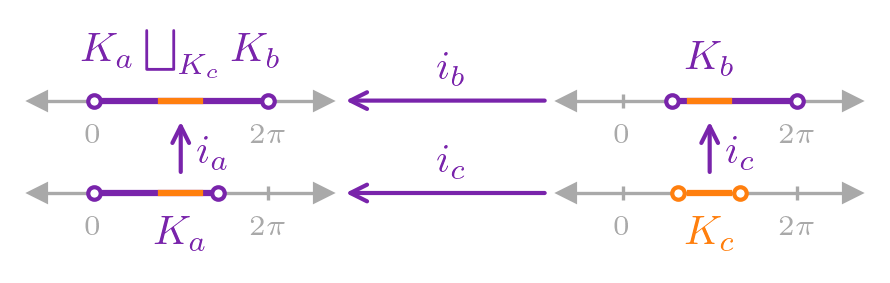

In [403]:
fig, ax = plt.subplots(figsize=(3.5, .5))

ax.set(xlim=(0,1), ylim=(0,1))

axh = .2
axw = .35
y1 = 0
y2 = 1-axh
x1 = 0
x2 = 1-axw

axu = {lab: numberline(ax, x, y, axw, axh, (-.2, .2)) for lab, (x,y) in 
         [("abc", (x1, y2)), ("a", (x2, y2)), ("b", (x1, y1)), ("c", (x2, y1))]}


# annotate: xy=head, xytext=tail

arrow_kwargs = dict(arrowprops=dict(arrowstyle = "->", color=pcd['base']))
text_kwargs = dict(color=pcd['base'], fontsize=fs['normal'])

arcb = ax.annotate("", xy=(1.05,.5), xytext=(-.05,.5), 
                   xycoords=axu['b'].transAxes, textcoords=axu['c'].transAxes, 
                  **arrow_kwargs)
                   
arcba = ax.annotate(r"$i_{c}$", (.5, 1.25), xycoords=arcb, 
                    ha='center', va='bottom', **text_kwargs)
            

araabc = ax.annotate("", xy=(1.05,.5), xytext=(-.05,.5), 
                   xycoords=axu['abc'].transAxes, textcoords=axu['a'].transAxes, 
                  **arrow_kwargs)
                   
araabca = ax.annotate(r"$i_{b}$", (.5, 1.25), xycoords=araabc, 
                      ha='center', va='bottom', **text_kwargs)

arca = ax.annotate("", xy=(.5, -.05), xytext=(.5, 1.05), 
                   xycoords=axu['a'].transAxes, textcoords=axu['c'].transAxes, 
                  **arrow_kwargs)
                   
arcaa = ax.annotate(r"$i_{c}$", (1.5, 0.5), xycoords=arca, 
                    ha='left', va='center', **text_kwargs)
            

araabc = ax.annotate("", xy=(.5, -.05), xytext=(.5, 1.05), 
                   xycoords=axu['abc'].transAxes, textcoords=axu['b'].transAxes, 
                  **arrow_kwargs)
                   
araabca = ax.annotate(r"$i_{a}$", (1.5, 0.5), xycoords=araabc, 
                      ha='left', va='center', **text_kwargs)

akwargs = dict(xycoords='axes fraction', ha='center', fontsize=fs['normal'])

p_kwargs = dict(lw = 1.5, marker= 'o', mfc='white', markersize=3)


kc_color = 'tab:orange'
kl_color = pcd['base']

axu['c'].annotate(r"$K_c$", (.5, -.5), va='top', **akwargs, color=kc_color)


kc_int = [np.pi-.7, np.pi+.7]
for a in ['a', 'b', 'c', 'abc']:
    axu[a].plot(kc_int, [0,0],  zorder=10, lw=1.5, color=kc_color)
    
# dots at edge of line
axu['c'].plot([kc_int[0]-32/72, kc_int[1]+28/72], [0, 0], zorder=9, marker='o', markersize=3,
              linestyle='none', mec=kc_color, mfc='white')


    
axu['abc'].annotate(r"$K_a\bigsqcup_{K_c}K_b$", xy=(.5,1.5), va='bottom', **akwargs, 
                   color=kl_color)

axu['b'].plot([0, np.pi+1.35], [0,0], zorder=9, **p_kwargs, color=kl_color)

axu['a'].annotate(r"$K_b$", (.5, 1.5), va='bottom', **akwargs, color=kl_color,)

axu['a'].plot( [np.pi-1.35, 2*np.pi], [0,0], zorder=9, **p_kwargs, color=kl_color)

axu['b'].annotate(r"$K_a$", (.5, -.5), va='top', **akwargs, color=kl_color)


axu['abc'].plot([0, 2*np.pi], [0,0], **p_kwargs, zorder=9, color=kl_color)

ax.axis('off')
ax.set(xlim=(0,1), ylim=(0,1))

fig.savefig(paper_path/'k_coproduct.pdf', bbox_inches='tight', backend='pgf')
fig.savefig(paper_path/'k_coproduct.png', bbox_inches='tight')

In [404]:
def plot_emojis(x, y, values):
    t = 'data'
    for i, row in enumerate(values):
        yo = np.array([.2, 0, -.2]) + y
        t = 'data'
        for j, pr in enumerate(row):
            if j == 0:
                xo = y
            else: 
                xo = .5 if pr in prcp[1:] else 1

            color = pcd['fiber'] if i == 1 else pc.lighten(pcd['fiber'], .20)
            t = ax.annotate(pr, xy=(xo, yo[i]), xycoords=(t, 'data'), 
                            fontfamily='segoe ui emoji', fontsize=fs['small'], 
                            usetex=False, ha='left', va='center', color = color)

In [405]:
time = ["🕒", "🕗", "🕛"]
temp = ["🍃", "☀️", "❄️"]
prcp = ["☁️", "⛈️", "🌨️"]

In [406]:
df = pd.read_csv("nydata.csv", parse_dates=['DATE'])

row = df[df['NAME'].str.contains('LAGUARDIA AP') & (df['DATE']== '2022-10-02')]
row['DATE'].dt.strftime("%m/%d/%y")

83600    10/02/22
Name: DATE, dtype: object

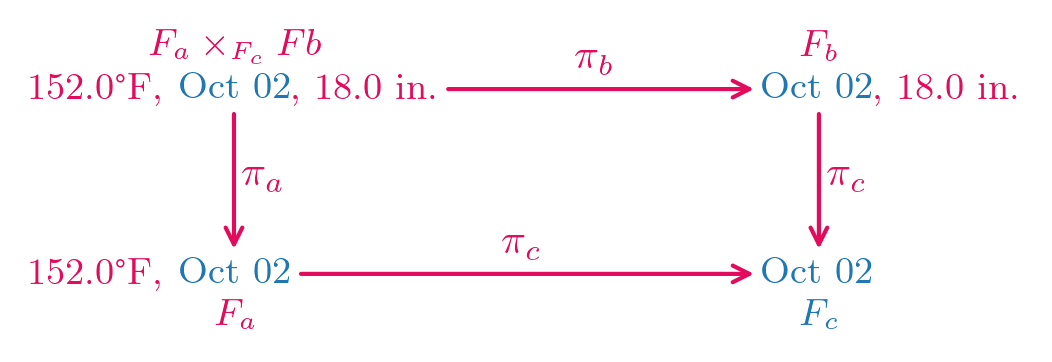

In [407]:
fig, ax = plt.subplots(figsize=(3.5, 1))
ax.set(xlim=(0,1), ylim=(0,1))
y1 = .0
y2 = .8
x1 = 0
x2 = .9

fc_color = 'tab:blue'
fl_color = pcd['fiber']

time = f"\t{row['DATE'].dt.strftime('%b %d').iloc[0]}"
temp = f"{row['TAVG'].iloc[0]}°F,\t"
prcp = f",\t{row['PRCP'].iloc[0]} in."

akwargs = dict(usetex=True, ha='left', va='bottom')
fc_args = dict(color=fc_color, fontsize=fs['small'])
fl_args = dict(color=fl_color, fontsize=fs['small'])
               
fabc_temp = ax.annotate(temp, (x1, y2), **akwargs, **fl_args)
fabc_time = ax.annotate(time, (1.1, 0), xycoords=fabc_temp, **akwargs, **fc_args)
fabc_prcp = ax.annotate(prcp, (1, 0), xycoords=fabc_time, **akwargs, **fl_args)


#fc  
fa_temp = ax.annotate(temp, (0, y1), xycoords= (fabc_temp, 'data'), **akwargs, **fl_args)
fa_time = ax.annotate(time, (0,y1), xycoords=(fabc_time, 'data'), **akwargs, **fc_args)
#fb
fb_time = ax.annotate(time, (x2,0), xycoords=('data', fabc_time), **akwargs, **fc_args)
fb_prcp = ax.annotate(prcp, (1, 0), xycoords=(fb_time, fabc_prcp), **akwargs, **fl_args)

#fb_c
fc_time = ax.annotate(time, (0,0), xycoords=(fb_time, fa_time), **akwargs, **fc_args)

#label each 

for label, anchor, top in [(r"$F_{a}\times_{F_{c}} F{b}$", fabc_time, True), 
                      (r"$F_{a}$", fa_time, False), (r"$F_{b}$", fb_time, True), (r"$F_{c}$", fc_time, False)]:
    color = fc_color if label == r"$F_{c}$" else fl_color
    if top:
        y_off = 1.25
        va='bottom'
    else:
        y_off = -.25
        va='top'
    fabc_label = ax.annotate(label, (.5, y_off), xycoords=anchor, 
                         color=color, va=va, ha='center', fontsize=fs['small'])
    
arrow_kwargs = dict(arrowprops=dict(arrowstyle = "->", color=pcd['fiber']))
text_kwargs = dict(color=pcd['fiber'], fontsize=fs['normal'])

#head tail
fabc_fb = ax.annotate("", xy=(0,.5), xytext=(1,.5), textcoords=(fabc_prcp, fabc_time), xycoords=fb_time, **arrow_kwargs)
fa_fc = ax.annotate("", xy=(0,.5), xytext=(1,.5), textcoords=fa_time, xycoords=fc_time, **arrow_kwargs)
fb_fc = ax.annotate("", xytext=(.5,0), xy = (.5, 1), xycoords=fc_time, textcoords=fb_time, **arrow_kwargs)
fabc_fa = ax.annotate("", xytext=(1.5,0), xy = (1.5, 1), xycoords=fa_temp, textcoords=fabc_temp, **arrow_kwargs)

fabc_fb_arr = ax.annotate(r"$\pi_{b}$", (0.5, 1.25), xycoords=fabc_fb, **text_kwargs, ha='center', va='bottom')
fabc_fa_arr = ax.annotate(r"$\pi_{a}$", (1, .5), xycoords=fabc_fa, **text_kwargs, ha='left', va='center')
fa_fc_arr = ax.annotate(r"$\pi_{c}$", (0.5, 1.25), xycoords=fa_fc, **text_kwargs, ha='center', va='bottom')
fb_fc_arr = ax.annotate(r"$\pi_{c}$", (1, .5), xycoords=fb_fc, **text_kwargs, ha='left', va='center')
ax.axis('off')
fig.savefig(paper_path/'f_product.pdf', bbox_inches='tight', backend='pgf')
fig.savefig(paper_path/'f_product.png', bbox_inches='tight')

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
C:\Users\story\AppData\Local\Temp\ipykernel_11204\3699702114.py:32: SyntaxWarning: invalid escape sequence '\c'
  glue.text(x1+(x2-x1)/2, .8 if i%2 else .65, f"$U_{i+1}\cap U_{i+2}$", size=fs['tiny']-1, ha='center', color=pcd['base'])


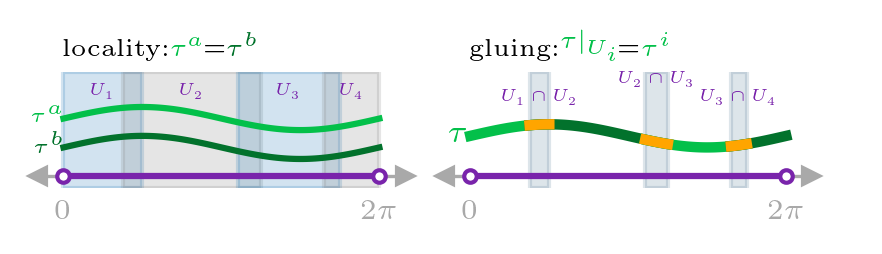

In [420]:
fig, ax = plt.subplots(figsize=(3.5, .5))
ax.set(xlim=(0,1), ylim=(0,1))


loc = numberline(ax, 0, 0, .45, 1, (-.1, .9), xpad=.5)
glue = numberline(ax, .5, 0, .45, 1, (-.1, .9), xpad=.5) 

x = [0, 2*np.pi]
p_kwargs = dict( marker= 'o', mfc='white', lw=1.5, markersize=3, color=pcd['base'], zorder=10)

loc.plot(x,[0,0], **p_kwargs)
glue.plot(x,[0,0], **p_kwargs)

cover = np.array([[0, np.pi/2], [np.pi/2-np.pi/8, 5*np.pi/4], 
         [5*np.pi/4-np.pi/7, 7*np.pi/4], [7*np.pi/4-np.pi/10, 2*np.pi]])

opencolor = ['tab:blue', 'gray']
sc = [pcd['section'], pc.lighten(pcd['section'], 1.25)]

for i, (x1, x2) in enumerate(cover):
    color = opencolor[i%2]
    loc.axvspan(x1, x2, alpha=.2, color=color)
    loc.text(x1+(x2-x1)/2, .7, f"$U_{i+1}$", size=fs['tiny']-1, ha='center', color=pcd['base'])
    
    xs = np.linspace(x1, x2, 100)
    glue.plot(xs, np.sin(xs)*.1 + .35, color=sc[i%2], lw=2.5)

    
for i, (x1, x2) in enumerate(np.vstack([cover[0:-1,1],cover[1:, 0]]).T):
    for color in opencolor:
        glue.axvspan(x1, x2, alpha=.1, color=color)
    glue.text(x1+(x2-x1)/2, .8 if i%2 else .65, f"$U_{i+1}\cap U_{i+2}$", size=fs['tiny']-1, ha='center', color=pcd['base'])

    xs = np.linspace(x1, x2, 100)
    glue.plot(xs, np.sin(xs)*.1 + .35, color='orange', lw=2.5, zorder=10)

xl = np.linspace(*x, 100)
s1, = loc.plot(xl, np.sin(xl)*.1 + .5, color=pcd['section'])
s2, = loc.plot(xl, np.sin(xl)*.1 + .25, color=tbc)
loc.annotate(r"$\tau^{a}$", xy=(0, .6), xycoords=s1, va='center', ha='right', 
             size=fs['tiny'], color=sc[0])
loc.annotate(r"$\tau^{b}$", xy=(0, .6), xycoords=s2, va='center', ha='right', 
             size=fs['tiny'], color=sc[1])
fontsize = fs['script']-1
loctrans = mtransforms.blended_transform_factory(loc.transData, loc.transAxes)
title = loc.text(0,1.1, "locality:", fontsize=fontsize, va='bottom', transform=loctrans)
t1 = loc.annotate(r"$\;\tau^{a}$", xy=(1,0), xycoords=title, va='bottom', 
                 ha='left', fontsize=fontsize, color=sc[0])
eq = loc.annotate(r"$=$", xy=(1,0), xycoords=t1, va='bottom', 
                 ha='left', fontsize=fontsize)
t2 = loc.annotate(r"$\tau^{b}$", xy=(1,0), xycoords=eq, va='bottom', 
                 ha='left', fontsize=fontsize, color=sc[1])

tg, = glue.plot(xl, np.sin(xl)*.1 + .35, color='none', ls='-')
glue.annotate(r"$\tau$",  xy=(-.02, .6), xycoords=tg, va='center', ha='right', 
             size=fs['tiny']+3, color=sc[0])

gluetrans = mtransforms.blended_transform_factory(glue.transData, glue.transAxes)
title = glue.text(0,1.1, "gluing:", fontsize=fontsize, va='bottom', transform=gluetrans)
t1 = glue.annotate(r"$\;\tau\vert_{U_i}$", xy=(1,0), xycoords=title, va='bottom', 
                 ha='left', fontsize=fontsize, color=sc[0])
eq = glue.annotate(r"$=$", xy=(1,0), xycoords=t1, va='bottom', 
                 ha='left', fontsize=fontsize)
t2 = glue.annotate(r"$\tau^{i}$", xy=(1,0), xycoords=eq, va='bottom', 
                 ha='left', fontsize=fontsize, color=sc[0])
ax.axis('off')
fig.savefig(paper_path/"sheaf_rules.png", bbox_inches='tight')

In [409]:
cover.shape

(4, 2)

In [352]:
np.vstack([cover[0:1, 0], cover[:-1,1] - cover[1:,0]])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 3